<a href="https://colab.research.google.com/github/aditya-malte/Simple-LP1-Codes/blob/master/DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the Pima Dataset from kagggle:
https://www.kaggle.com/uciml/pima-indians-diabetes-database/download

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [0]:
data = pd.read_csv("diabetes.csv")

In [0]:
columns = data.columns

In [0]:
columns = [col_name for col_name in columns if not col_name=="Outcome"]

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


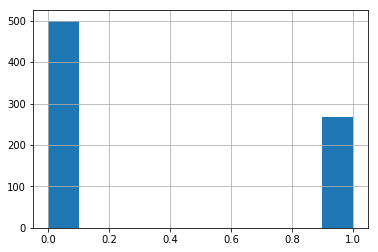

In [6]:
data["Outcome"].hist()

In [0]:
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [0]:
#scale values
scaler = MinMaxScaler()
X[columns] = scaler.fit_transform(X)

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [13]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
247,0.000000,0.829146,0.737705,0.333333,0.803783,0.779434,0.149018,0.033333
138,0.000000,0.648241,0.655738,0.000000,0.000000,0.464978,0.266866,0.133333
674,0.470588,0.457286,0.672131,0.000000,0.000000,0.530551,0.217336,0.783333
419,0.176471,0.648241,0.524590,0.292929,0.135934,0.393443,0.060205,0.116667
238,0.529412,0.824121,0.688525,0.212121,0.000000,0.459016,0.321520,0.183333


In [14]:
train_y.head()

247    0
138    0
674    0
419    1
238    1
Name: Outcome, dtype: int64

In [15]:
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
53,0.470588,0.884422,0.737705,0.343434,0.354610,0.502235,0.166097,0.616667
482,0.235294,0.427136,0.475410,0.222222,0.057920,0.414307,0.097353,0.116667
24,0.647059,0.718593,0.770492,0.333333,0.172577,0.545455,0.075149,0.500000
249,0.058824,0.557789,0.704918,0.191919,0.000000,0.448584,0.027754,0.033333
430,0.117647,0.497487,0.000000,0.000000,0.000000,0.330849,0.012810,0.033333


In [16]:
test_y.head()

53     1
482    0
24     1
249    0
430    0
Name: Outcome, dtype: int64

In [0]:
model = GaussianNB()

In [18]:
model.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
predictions = model.predict(test_X)

In [20]:
model.score(test_X, test_y)

0.7575757575757576

In [21]:
confusion_matrix(test_y, predictions)

array([[125,  23],
       [ 33,  50]])